## Chirp Signal Example
For a signal defined as $x(t)  = cos(\phi(t))$,  instantaneous angular frequency, ω, is defined as the phase rate as given by the first derivative of phase, with the instantaneous ordinary frequency, f, being its normalized version: $w(t) = \frac{d\phi(t)}{dt}, f(t)=\frac{w(t)}{2\pi}$

In a linear-frequency chirp or simply linear chirp, the instantaneous frequency $f ( t )$ varies exactly linearly with time: $f ( t ) = ct + f_0$ 

where $f_0$ is the starting frequency at time t = 0, and c is the chirpyness, assumed constant: 
Hence, $\phi(t) = \phi_0 + \int_{0}^{t}(ct + f_0)d\tau = \phi_0 + ct^2/2 + f_0 t$

Reference : https://en.wikipedia.org/wiki/Chirp

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate

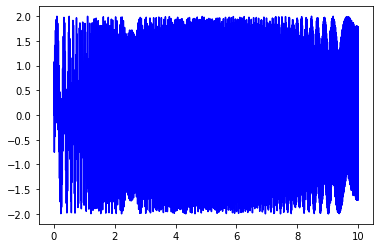

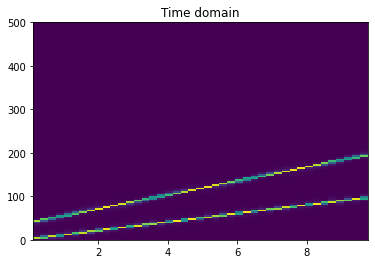

In [27]:
## Sampling rate, total duration 
srate = 1000
t = np.arange(0,10,1/srate)
n = len(t)


f  = [2, 100] # FOr chirp 1
c = np.diff(f) / (t[-1] - t[0])
phi_t = (c/2) * t **2 + f[0]*t
#ff = np.linspace(f[0], f[1],n)
signal1 = np.sin(2*np.pi*phi_t)


f  = [40, 200] # For chirp 2
c = np.diff(f) / (t[-1] - t[0])
phi_t = (c/2) * t **2 + f[0]*t
#ff = np.linspace(f[0], f[1],n)
signal2 = np.sin(2*np.pi*phi_t)

signal_sum = signal1 + signal2 

plt.plot(t,signal_sum,'b')
plt.show()
plt.title('Time domain')

f, t, Sxx = signal.spectrogram(signal_sum, srate)
plt.pcolormesh(t, f, Sxx);
plt.ylim([0,500]);